



<h1><font color="#004D7F" size=6>Análisis de componentes principales</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Maite Alonso</font><br>
<font color="#004D7F" size=3>Máster universitario ingeniería informática</font><br>
<font color="#004D7F" size=3>Universidad de Castilla-La Mancha</font>

</div>

<h2>**José María García García**</h2>

Compara la técnica bivariada análisis de componentes y Análisis de discriminates para la clasificación de semillas, con el dataset seeds_dataset, cuyas variables son:
* Área de la semilla
* Perímetro
* Compacidad
* Longitud
* Anchura
* Asimetria
* Longitud de la ranura
* Tipo: kama, Rosa, Canadian


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv("./datos/seeds_dataset.csv",sep=';')
data.head()

,area,perimetro,compacidad,longitud,anchura,asimetria,long ranura,tipo
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


<h2>Análisis de datos</h2>

Para determinar qué características son más significativas, con miras a determinar cuáles son los componentes principales en un conjunto de datos, hemos de revisar los datos primero.

In [2]:
data.describe()

,area,perimetro,compacidad,longitud,anchura,asimetria,long ranura
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


Observando los datos que devuelve la función `describe()`, vemos que los datos parecen bastante uniformes, a excepción quizás de la **asimetría**, cuya distribución parece estar más desplazada a la izquierda: el 75% de los datos quedan por debajo de 4.76, quedando a la derecha un conjunto de valores que crece hasta el doble (8.45). No obstante, viendo el valor que tiene la desviación de la asimetria, el valor máximo podría ser un outlier.<br/>


Para comprobar esto, usaremos un diagrama de cajas.

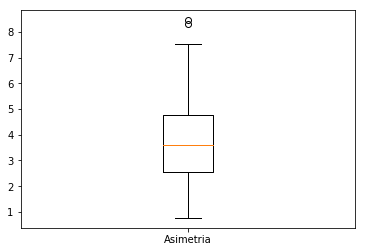

In [3]:
plt.boxplot(data['asimetria'])
plt.gca().set_xticklabels(['Asimetria'])

El diagrama de cajas anterior nos muestra que, frente a la hipotesis inicial, los **datos si son bastante regulares**. Si bien es cierto que la caja parece desplazada más hacia el bigote izquierdo (inferior), podemos decir que los datos son tan regulares como el resto, siendo ese **valor máximo**, efectivamente, un **outlier**.

Para terminar de analizar los datos, usaremos un **histograma** que nos permita ver tendencias y/u otros outliers que no hayamos detectado. Finalmente, usaremos un **mapa de calor** para encontrar correlaciones entre variables

In [4]:
#Guardamos los valores cuantitativos en una variable y las categorías en otra
X = data.iloc[:, :7].values
y = data.iloc[:, 7].values

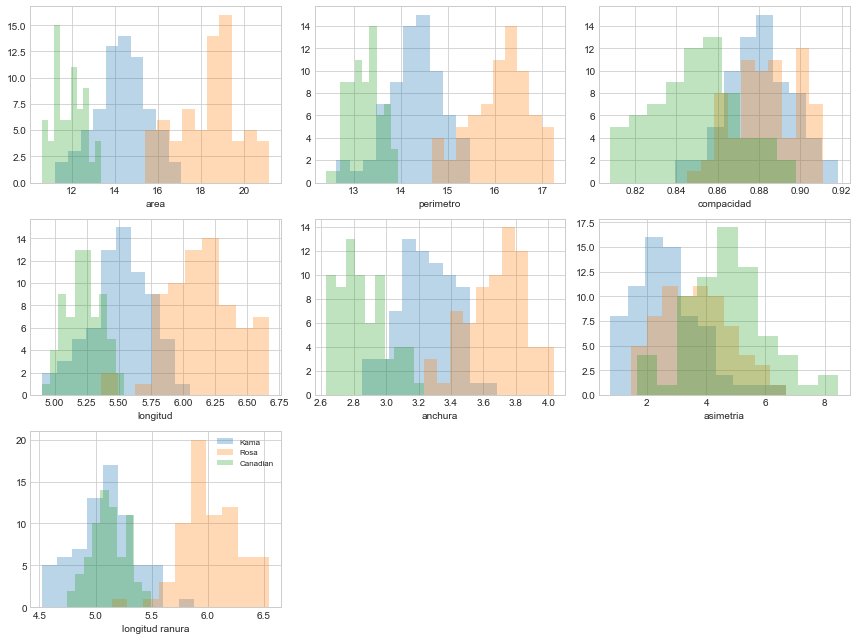

In [5]:
label_dict = {1: 'Kama',
              2: 'Rosa',
              3: 'Canadian'}
feature_dict = {0: 'area',
                1: 'perimetro',
                2: 'compacidad',
                3: 'longitud',
                4: 'anchura',
                5: 'asimetria',
                6: 'longitud ranura'
               }
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 9))
    for cnt in range(7):
        plt.subplot(3, 3, cnt+1)
        for lab in ('Kama', 'Rosa', 'Canadian'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right',  fontsize=8)
    plt.tight_layout()
    plt.show()

En este histograma vemos que las variables *longitud* y *longitud abertura* también presentan outliers (columnas separadas del resto en este caso). 

Veamos lo que nos indica el mapa de calor.

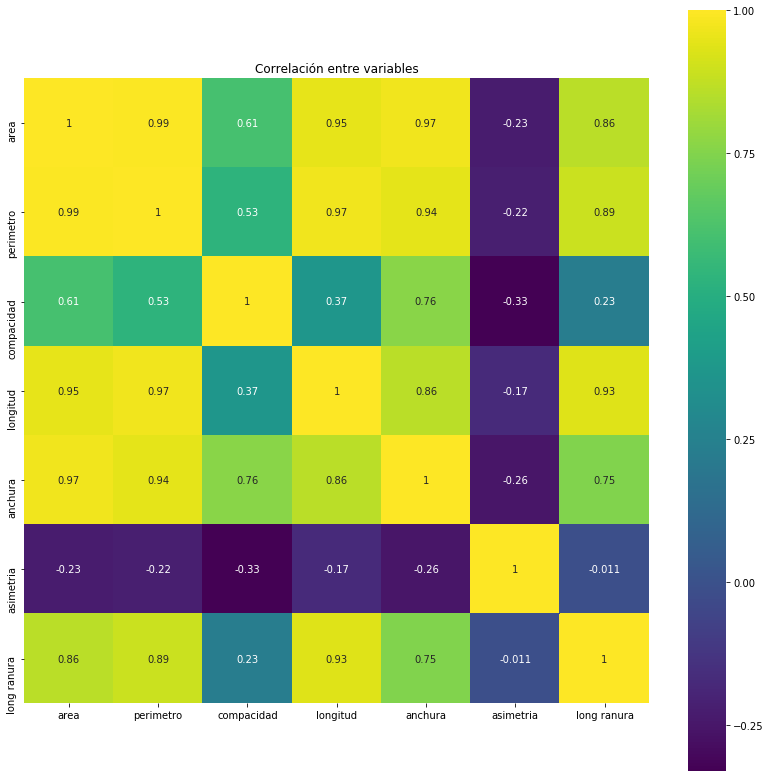

In [6]:
correlation = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlación entre variables')

Este mapa de calor señala claramente que existe una **correlación positiva** de la **compacidad** (lo compacta que es una semilla) con el resto, y una **correlación negativa** de la **asimetria** con el resto.

<h2>Análisis de Componentes Principales</h2>

El primer caso es normalizar los datos para que todos tengan la misma escala. En principio todos los valores están en centimetros, pero no todos presentan el mismo rango de datos.

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Haciendo uso de la clase `PCA` del paquete `sklearn` de Python realizaremos el análisis de componentes principales. Primero realizaremos el análisis con todas las variables (`n_components=7`) y estudiaremos qué componente principal añade más variabilidad a los datos.

In [8]:
from sklearn.decomposition import PCA
mipca = PCA(n_components=7)
mipca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
#Las componentes principales
print(mipca.components_)

[[ 0.44447352  0.44157147  0.27701737  0.42356333  0.43281866 -0.11869248
   0.38716084]
 [-0.02656355 -0.08400282  0.52915125 -0.20597518  0.11668963 -0.71688203
  -0.37719327]
 [ 0.02587094 -0.05983912  0.62969178 -0.21187966  0.21648338  0.67950584
  -0.2138972 ]
 [ 0.19363997  0.29545659 -0.3328164   0.26340659  0.19963039  0.09246481
  -0.80414995]
 [ 0.20441167  0.17427591 -0.33265481 -0.76609839  0.46536555 -0.03625822
   0.11134657]
 [-0.42643686 -0.47623853 -0.14162884  0.27357647  0.70301171 -0.01964186
   0.04282974]
 [ 0.73480569 -0.67075153 -0.0725527   0.04627605 -0.03928908 -0.00372346
  -0.0344981 ]]


In [10]:
#Varianza recogida por cada componente y el % de varianza que recoge cada componente
print(mipca.explained_variance_)
print(mipca.explained_variance_ratio_)

[5.05527392e+00 1.20330286e+00 6.81247474e-01 6.86915798e-02
 1.88031478e-02 5.35755786e-03 8.16283865e-04]
[7.18743027e-01 1.71081835e-01 9.68576341e-02 9.76635386e-03
 2.67337271e-03 7.61720812e-04 1.16056686e-04]


Gracias a esto vemos que la **primera y segunda componente** representan una **varianza de 5.055 y 1.203** respectivamente, lo que, en cuestión de **ratio**, se traduce al **71.87% y 17.11%**. Estas dos componentes capturan ya el **88.98%** de la varianza, lo que sube al **98.66%** si añadimos la tercera componente.

<h2>Elección número de componentes</h2>

En la siguiente gráfica vemos que con solo **tres variables** ya capturamos más del 95% de la varianza, por lo que nos quedamos con tres variables para el PCA.

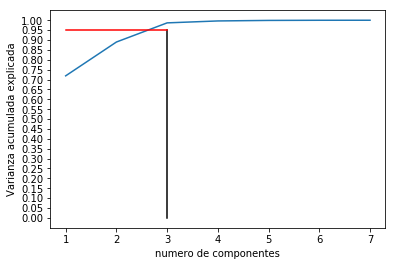

In [11]:
plt.plot(np.cumsum(mipca.explained_variance_ratio_))
plt.xlabel('numero de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.gca().set_xticklabels(np.arange(0,8,1))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.plot((2,2), (0,0.95), 'k-')
plt.plot((0,2), (0.95,0.95), 'r-')
plt.show()

In [12]:
mipca2 = PCA(n_components=3)
mipca2.fit(X_std)
X_r = mipca2.fit(X_std).transform(X_std)

## Rotación de componentes

Dado que tenemos tres elementos a comparar, para poder apreciarlos correctamente lo mejor es hacer una representación en **3 dimensiones**.

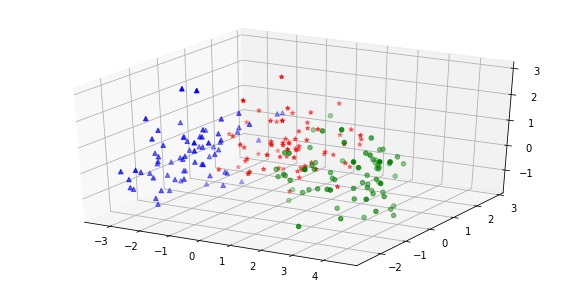

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
principalComponents = mipca2.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2', 'PC3'])

#plt.figure(figsize=(10,10))
rcParams['figure.figsize'] = 10, 5
finalDf = pd.concat([principalDf, data[['tipo']]], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
f_types = ['Kama', 'Rosa', 'Canadian']
colors = ['r', 'g', 'b']
markers = ['*', 'o', '^']
for f_type, color, marker in zip(f_types, colors, markers):
    indices = finalDf['tipo'] == f_type
    ax.scatter(
        finalDf.loc[indices, 'PC1'], 
        finalDf.loc[indices, 'PC2'],
        finalDf.loc[indices, 'PC3'],
        c=color,
        marker = marker
    )
plt.show()

Con esta representación podemos ver que los datos relativos al tipo **Rosa** y **Canadian** (nube de estrellas rojas y circulos verdes) están bastante solapados. Otra forma de estudiar estos datos es haciendo la **comparación de componentes en pares**.

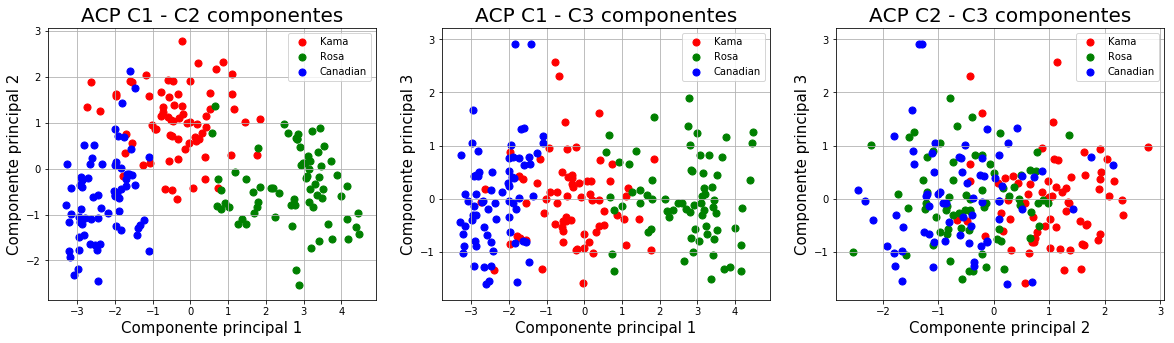

In [14]:
from pylab import rcParams
principalComponents = mipca2.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2', 'PC3'])

#plt.figure(figsize=(10,10))
rcParams['figure.figsize'] = 20, 5
finalDf = pd.concat([principalDf, data[['tipo']]], axis = 1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
#PRIMER GRAFICO, RELACION ENTRE PC1
ax1.set_xlabel('Componente principal 1', fontsize = 15)
ax1.set_ylabel('Componente principal 2', fontsize = 15)
ax1.set_title('ACP C1 - C2 componentes', fontsize = 20)

targets = ['Kama', 'Rosa', 'Canadian']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['tipo'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

#SEGUNDO GRAFICO, RELACION ENTRE PC1 y PC3
ax2.set_xlabel('Componente principal 1', fontsize = 15)
ax2.set_ylabel('Componente principal 3', fontsize = 15)
ax2.set_title('ACP C1 - C3 componentes', fontsize = 20)

#targets = ['Kama', 'Canadian']
#colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['tipo'] == target
    ax2.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax2.legend(targets)
ax2.grid()

#TERCER GRAFICO, RELACION ENTRE PC2 y PC3
ax3.set_xlabel('Componente principal 2', fontsize = 15)
ax3.set_ylabel('Componente principal 3', fontsize = 15)
ax3.set_title('ACP C2 - C3 componentes', fontsize = 20)

#targets = ['Rosa', 'Canadian']
#colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['tipo'] == target
    ax3.scatter(finalDf.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax3.legend(targets)
ax3.grid()

plt.show()

Estos gráficos nos confirman lo que ya se apreciaba en la proyección 3D, y es que existe un solape considerable entre los componentes, concretamente entre el 2 y el 3.

 ##  Análisis de discriminantes
 
El análisis discriminante (LDA) es una técnica para tratar de encontrar las variables que permiten diferenciar a los grupos y cuántas de estas variables son necesarias para alcanzar la mejor clasificación posible.

La pertenencia a los grupos, conocida de antemano, se utiliza como variable dependiente (una variable categórica con tantos valores discretos como grupos). Las variables en las que suponemos que se diferencian los grupos se utilizan como variables independientes o variables de clasificación (variables discriminantes).

El objetivo de este análisis es encontrar la componente que más facilite la discriminación de elementos para poder usarla para clasificar nuevos datos.

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
X_r2 = lda.fit(X_std, y).transform(X_std)
lda.scalings_

array([[ -1.23012901,  12.17801136],
       [  4.94977091, -11.08173861],
       [  0.13973486,  -2.05044155],
       [ -2.64682637,  -3.46121542],
       [  0.01396029,   0.26908452],
       [ -0.06756961,   0.48187203],
       [  1.52882041,   3.38992193]])

In [16]:
lda.explained_variance_ratio_

array([0.68141241, 0.31858759])

<h2>Análisis de discriminantes vs Análisis de componentes principales</h2>

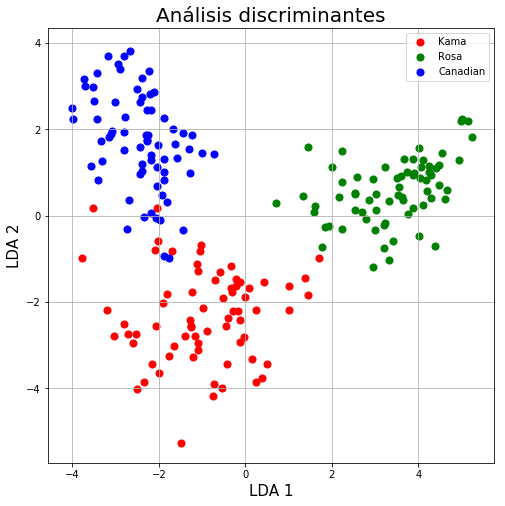

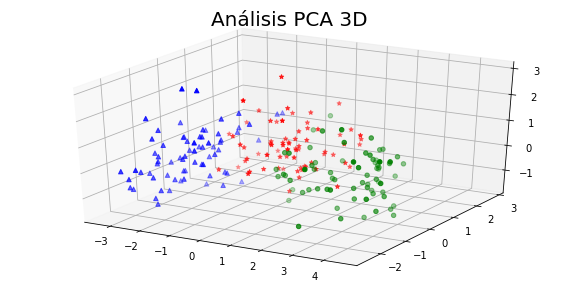

In [20]:
from pylab import rcParams

#plt.figure(figsize=(10,10))
principalDf = pd.DataFrame(data = X_r2, columns = ['LDA1','LDA2'])
finalDf = pd.concat([principalDf, data[['tipo']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('Análisis discriminantes', fontsize = 20)

targets = ['Kama', 'Rosa', 'Canadian']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['tipo'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'LDA1']
               , finalDf.loc[indicesToKeep, 'LDA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

principalComponents = mipca2.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2', 'PC3'])
finalDf = pd.concat([principalDf, data[['tipo']]], axis = 1)

fig = plt.figure()
rcParams['figure.figsize'] = 10, 10

ax = fig.add_subplot(111, projection='3d')
ax.set_title('Análisis PCA 3D', fontsize = 20)
f_types = ['Kama', 'Rosa', 'Canadian']
colors = ['r', 'g', 'b']
markers = ['*', 'o', '^']
for f_type, color, marker in zip(f_types, colors, markers):
    indices = finalDf['tipo'] == f_type
    ax.scatter(
        finalDf.loc[indices, 'PC1'], 
        finalDf.loc[indices, 'PC2'],
        finalDf.loc[indices, 'PC3'],
        c=color,
        marker = marker
    )

plt.show()

En esta comparativa, vemos que el análisis de discriminantes nos ha dado una separación más obvia de las tres clases, mientras que en el análisis de componentes los "limites" de cada tipo están solapados unos con otros.